In [1]:
import tensorflow as tf
import tensorflow.keras.layers as tfl
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
import os

https://alexlenail.me/NN-SVG/LeNet.html

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [26]:
#@title To move images
# To move the sets

# import shutil

# total_nic_images = 206
# total_notnic_notperson_images = 210
# total_notnic_person_images = 465

# # 75/25 split

# # Nic
# train_threshold = int(total_nic_images * 0.75)

# for i in range(145, total_nic_images):

#   if i <= train_threshold:
#     shutil.move("/content/drive/MyDrive/Nicolas Cage/nic/Nic_Cage_" + str(i) + ".jpg", 
#                 "/content/drive/MyDrive/Nicolas Cage/dataset/train/class1") 
#   else:
#     shutil.move("/content/drive/MyDrive/Nicolas Cage/nic/Nic_Cage_" + str(i) + ".jpg", 
#                 "/content/drive/MyDrive/Nicolas Cage/dataset/test/class1") 

# # Notnic person
# train_threshold = int(total_notnic_person_images * 0.75)

# for i in range(500, 500+total_notnic_person_images):
#   if i <= train_threshold:
#     shutil.move("/content/drive/MyDrive/Nicolas Cage/not_nic_person/Cópia de 00" + str(i) + ".png", 
#                 "/content/drive/MyDrive/Nicolas Cage/dataset/train/class0") 
#   else:
#     shutil.move("/content/drive/MyDrive/Nicolas Cage/not_nic_person/Cópia de 00" + str(i) + ".png", 
#                 "/content/drive/MyDrive/Nicolas Cage/dataset/test/class0") 

# # Notninc for test
# train_threshold = int(total_notnic_notperson_images * 0.75)

# for i in range(total_notnic_notperson_images):
#   if i <= train_threshold:
#     shutil.move("/content/drive/MyDrive/Nicolas Cage/not_nic_not_person/not_nicolas_" + str(i) + ".jpg", 
#                 "/content/drive/MyDrive/Nicolas Cage/dataset/train/class0") 
#   else:
#     shutil.move("/content/drive/MyDrive/Nicolas Cage/not_nic_not_person/not_nicolas_" + str(i) + ".jpg", 
#                 "/content/drive/MyDrive/Nicolas Cage/dataset/test/class0") 



In [27]:
#@title Moving content from one dir to another
# source: https://stackoverflow.com/questions/41826868/moving-all-files-from-one-directory-to-another-using-python


# import shutil
# import os
    
# source_dir = '/content/drive/MyDrive/Nicolas Cage/dataset/test/class0'
# target_dir = '/content/drive/MyDrive/Nicolas Cage/dataset/class0'
    
# file_names = os.listdir(source_dir)
    
# for file_name in file_names:
#     shutil.move(os.path.join(source_dir, file_name), target_dir)

In [28]:
#@title Create the datasets with augmentations
# Image augmentations 
# from keras.preprocessing.image import ImageDataGenerator

# train_datagen = ImageDataGenerator(rescale = 1./255)

# test_datagen = ImageDataGenerator(rescale = 1./255)

# training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Nicolas Cage/dataset/train',
#                                                  target_size = (200, 200),
#                                                  batch_size = 32,
#                                                  shuffle = False, 
#                                                  class_mode = "binary")

# test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Nicolas Cage/dataset/test',
#                                             target_size = (200, 200),
#                                             batch_size = 32,
#                                             shuffle = False,
#                                             class_mode = "binary")
# print(training_set.class_indices)
# print(training_set)

In [3]:
# Get the datasets
# source: https://www.tensorflow.org/tutorials/load_data/images

data_dir = "/content/drive/MyDrive/Nicolas Cage/dataset"
img_height, img_width = 180, 180
batch_size = 32

validation_split = 0.25
seed = 123

training_set = tf.keras.utils.image_dataset_from_directory(
                  data_dir,
                  label_mode='binary',
                  validation_split=validation_split,
                  subset="training",
                  seed=seed,
                  # image_size=(img_height, img_width),
                  batch_size=batch_size,
                  crop_to_aspect_ratio=True)

validation_set = tf.keras.utils.image_dataset_from_directory(
                  data_dir,
                  label_mode='binary',
                  validation_split=validation_split,
                  subset="validation",
                  seed=seed,
                  # image_size=(img_height, img_width),
                  batch_size=batch_size,
                  crop_to_aspect_ratio=True)

Found 879 files belonging to 2 classes.
Using 660 files for training.
Found 879 files belonging to 2 classes.
Using 219 files for validation.


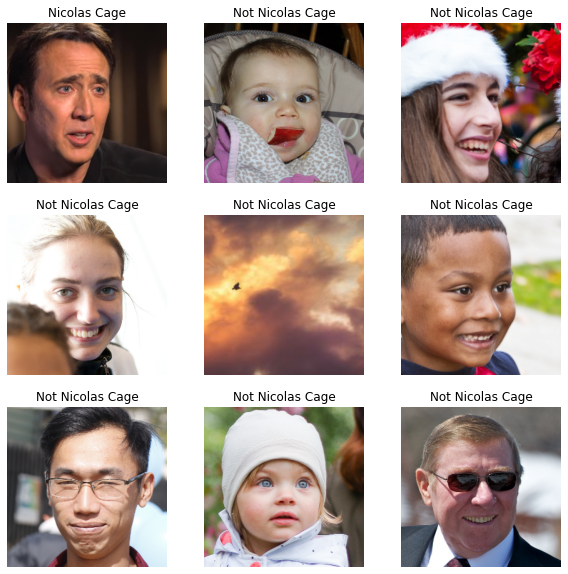

In [4]:
# Vizualize the training set
class_names = training_set.class_names

plt.figure(figsize=(10, 10))
for images, labels in training_set.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title("Nicolas Cage" if labels[i] else "Not Nicolas Cage")
    plt.axis("off")

In [5]:
# Configure the dataset for performance
AUTOTUNE = tf.data.AUTOTUNE

train_ds = training_set.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = validation_set.cache().prefetch(buffer_size=AUTOTUNE)

In [6]:
# The model
classifier = tf.keras.models.Sequential()

# Preprocessing Layers
classifier.add(tfl.Resizing(img_height, img_width))
classifier.add(tfl.Rescaling(1./255))

# Data Augmentation
classifier.add(tfl.RandomFlip("horizontal_and_vertical"))
classifier.add(tfl.RandomRotation(0.2))

# Convnet Layers
classifier.add(tfl.Conv2D(filters=32, kernel_size=(3, 3), input_shape = (180, 180, 3), activation = 'relu'))
classifier.add(tfl.MaxPooling2D(pool_size = (2, 2)))
classifier.add(tfl.Conv2D(filters=32, kernel_size=(3, 3), activation = 'relu'))
classifier.add(tfl.MaxPooling2D(pool_size=(2, 2)))
classifier.add(tfl.Conv2D(filters=64, kernel_size=(3, 3), activation = 'relu'))
classifier.add(tfl.MaxPooling2D(pool_size=(2, 2)))
classifier.add(tfl.Flatten())
classifier.add(tfl.Dense(units=64, activation = 'relu'))
classifier.add(tfl.Dropout(0.5))
classifier.add(tfl.Dense(1))
classifier.add(tfl.Activation('sigmoid'))

# Compile the model
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [7]:
classifier.build((None, img_height, img_width, 3))
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing (Resizing)         (None, 180, 180, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 random_flip (RandomFlip)    (None, 180, 180, 3)       0         
                                                                 
 random_rotation (RandomRota  (None, 180, 180, 3)      0         
 tion)                                                           
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                      

In [34]:
# Train the model

history = classifier.fit(
            train_ds,
            validation_data=val_ds,
            epochs=150,
)

Epoch 1/150
21/21 [==============================] - 44s 2s/step - loss: 0.5727 - accuracy: 0.7439 - val_loss: 0.5283 - val_accuracy: 0.8174
Epoch 2/150
21/21 [==============================] - 26s 1s/step - loss: 0.5568 - accuracy: 0.7561 - val_loss: 0.4803 - val_accuracy: 0.8265
Epoch 3/150
21/21 [==============================] - 26s 1s/step - loss: 0.5380 - accuracy: 0.7545 - val_loss: 0.5410 - val_accuracy: 0.7443
Epoch 4/150
21/21 [==============================] - 25s 1s/step - loss: 0.5242 - accuracy: 0.7621 - val_loss: 0.4609 - val_accuracy: 0.7945
Epoch 5/150
21/21 [==============================] - 26s 1s/step - loss: 0.5033 - accuracy: 0.7606 - val_loss: 0.5269 - val_accuracy: 0.8037
Epoch 6/150
21/21 [==============================] - 26s 1s/step - loss: 0.4916 - accuracy: 0.7788 - val_loss: 0.4325 - val_accuracy: 0.8402
Epoch 7/150
21/21 [==============================] - 26s 1s/step - loss: 0.4597 - accuracy: 0.7758 - val_loss: 0.4045 - val_accuracy: 0.8447
Epoch 8/150
2

In [41]:
# Save the model
classifier.save("/content/drive/MyDrive/Nicolas Cage/h5/model_1.h5")


In [8]:
# Or load the model

classifier = tf.keras.models.load_model("/content/drive/MyDrive/Nicolas Cage/h5/model_1.h5")

In [ ]:
#@title Fit com data augmentation
# history = classifier.fit_generator(training_set,
#                         steps_per_epoch = 1000,
#                         epochs = 25,
#                         validation_data = test_set,
#                         validation_steps = 100)

# history = classifier.fit(training_set, epochs=10, batch_size=16)
# history = classifier.fit_generator(training_set, epochs=5, validation_data=test_set)


In [9]:
classifier.evaluate(val_ds)

7/7 [==============================] - 28s 326ms/step - loss: 0.2392 - accuracy: 0.9315


[0.23924677073955536, 0.931506872177124]

In [ ]:
# Plot training & validation accuracy values

print(history.history.keys())

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

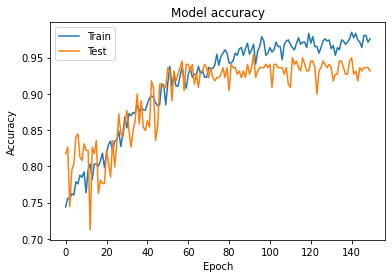

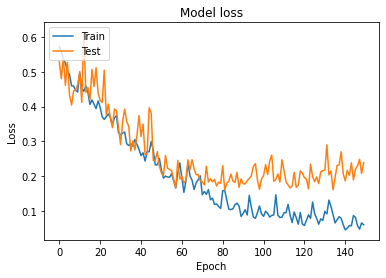

In [11]:
def is_this_nic(file, classifier):

  test_image = image.load_img(file, target_size = (180, 180))
  test_image = image.img_to_array(test_image)
  test_image = np.expand_dims(test_image, axis = 0)
  
  result = classifier.predict(test_image)
  print(result)

  # training_set.class_indices
  if result[0][0] >= 0.7:
      prediction = 'This is Nicolas Cage:'
      ret = True
  else:
      prediction = 'This is not Nicolas Cage:'
      ret = False

  print(prediction)
  img = Image(file, width = "400", height = "400")
  display(img)
  print("\n")
  print("\n")

  return ret

[[0.00102076]]
This is not Nicolas Cage:


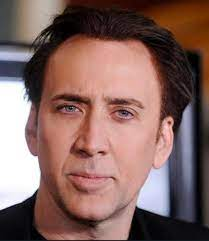





[[0.9993584]]
This is Nicolas Cage:


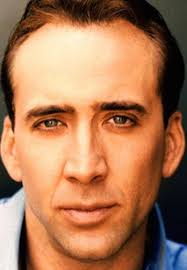





[[0.99189186]]
This is Nicolas Cage:


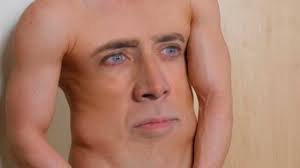





[[0.5720596]]
This is not Nicolas Cage:


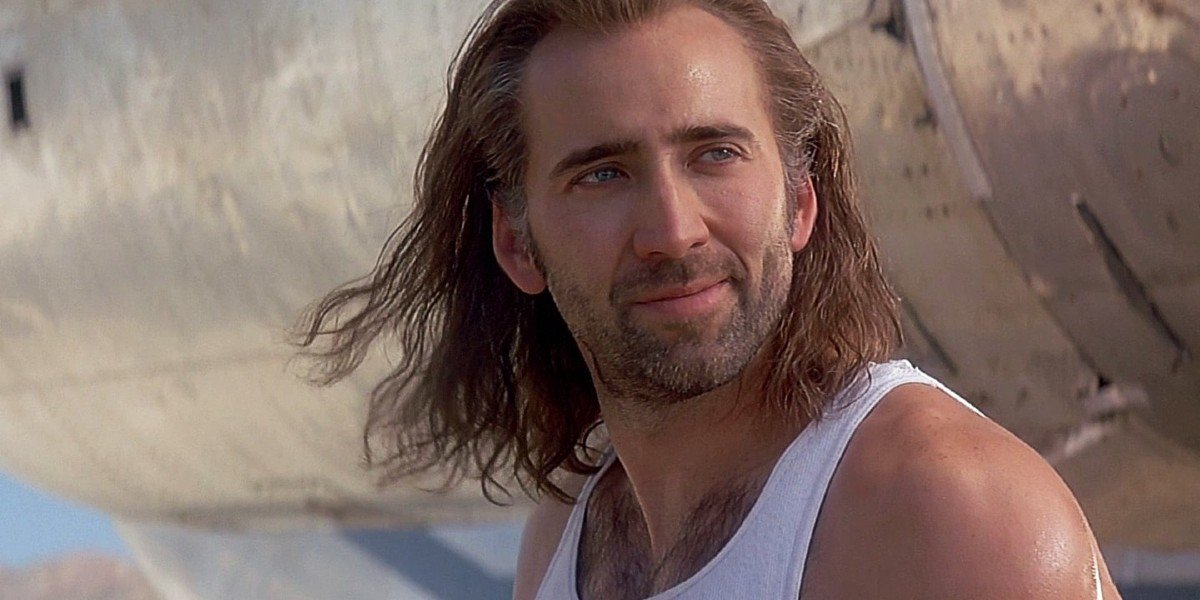





[[0.9540491]]
This is Nicolas Cage:


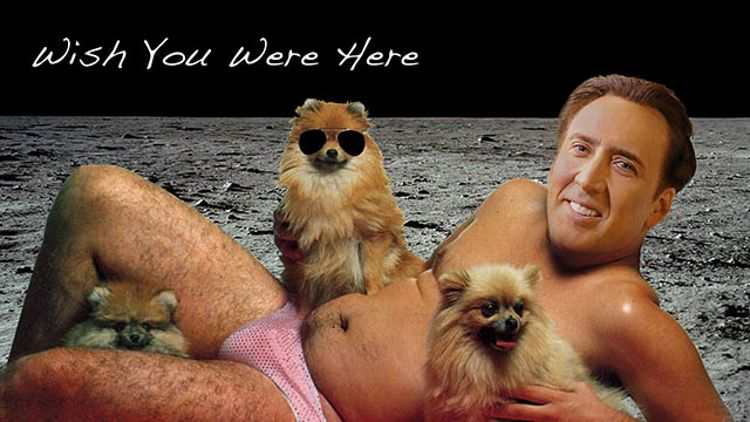





[[0.44445404]]
This is not Nicolas Cage:


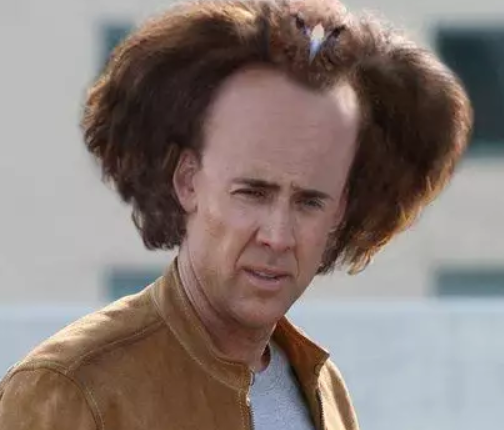





[[0.00750342]]
This is not Nicolas Cage:


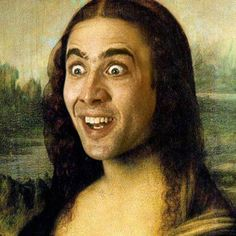





[[0.00374112]]
This is not Nicolas Cage:


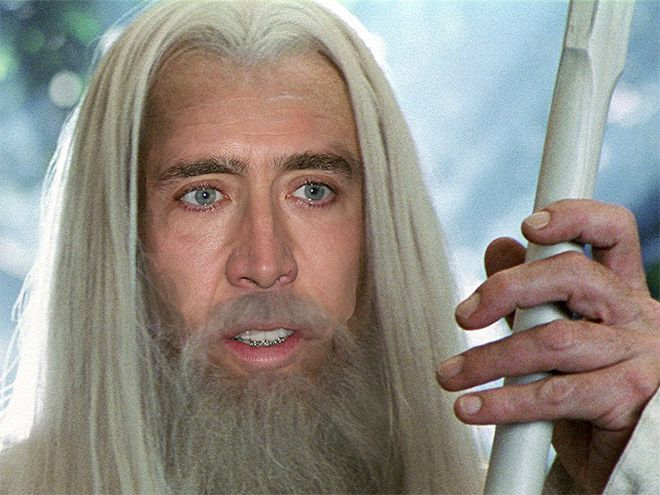





[[0.7906095]]
This is Nicolas Cage:


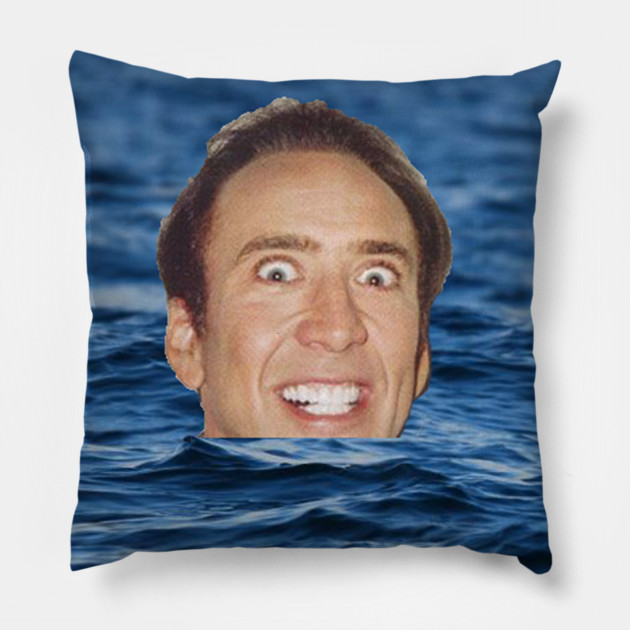





[[1.1196951e-07]]
This is not Nicolas Cage:


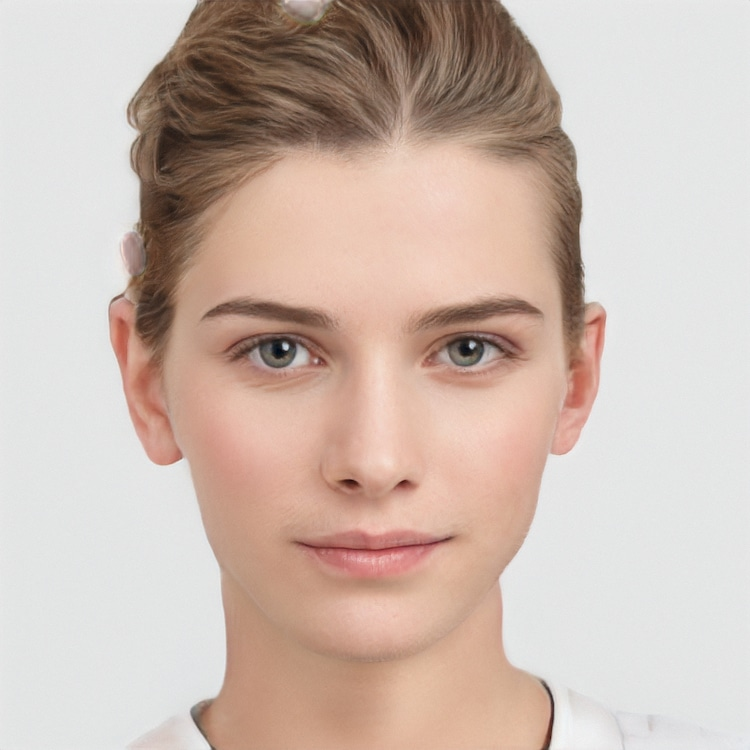





[[9.4212237e-07]]
This is not Nicolas Cage:


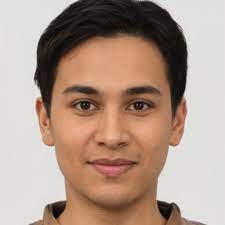





[[1.3579435e-05]]
This is not Nicolas Cage:


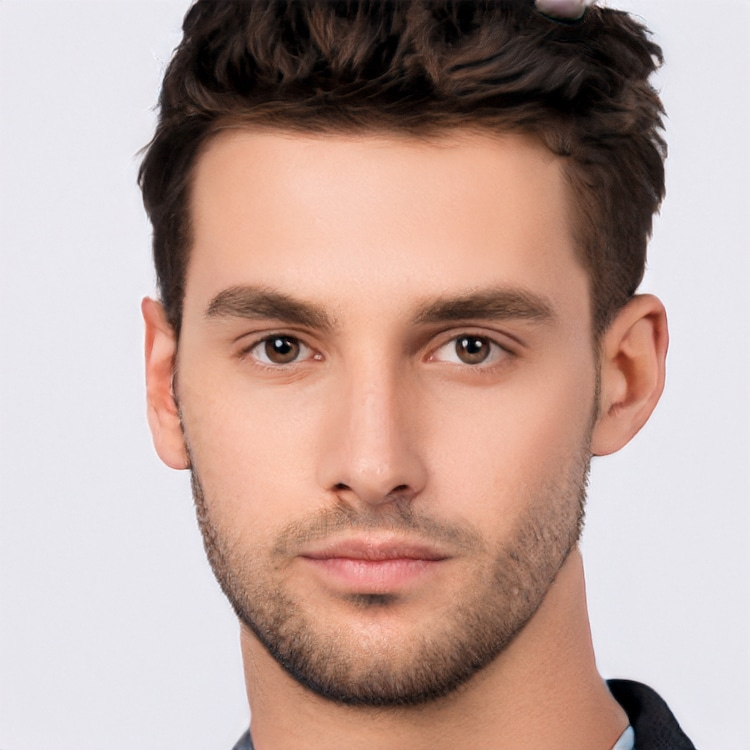





[[0.04251787]]
This is not Nicolas Cage:


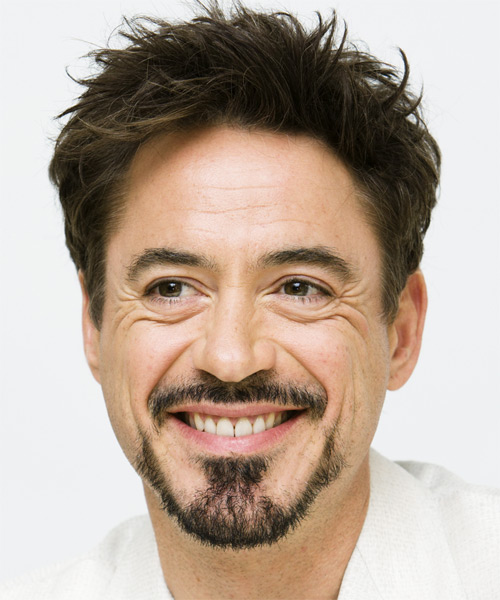





[[0.98681396]]
This is Nicolas Cage:


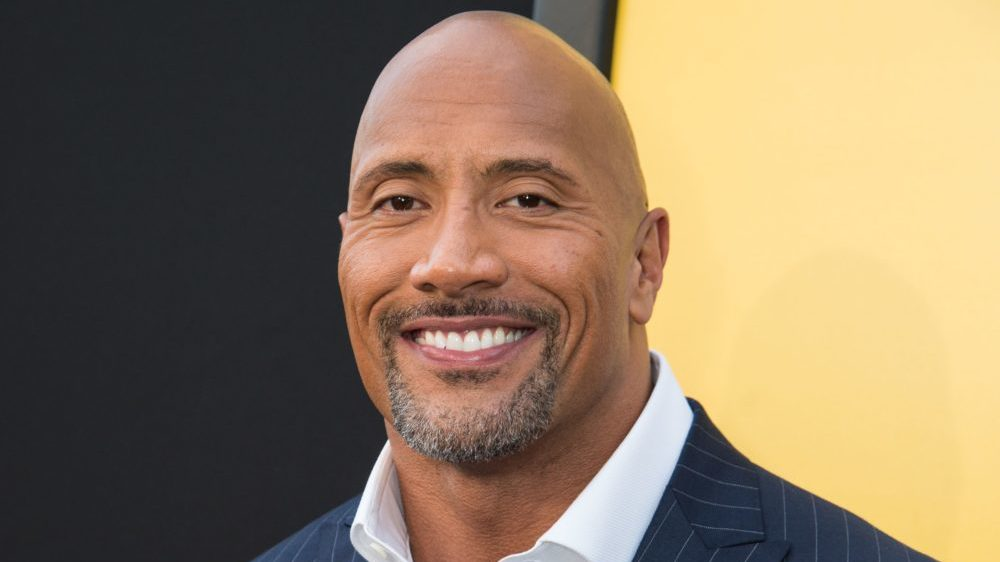





[[0.8994278]]
This is Nicolas Cage:


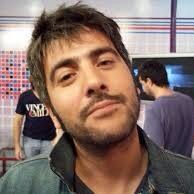





[[0.9747508]]
This is Nicolas Cage:


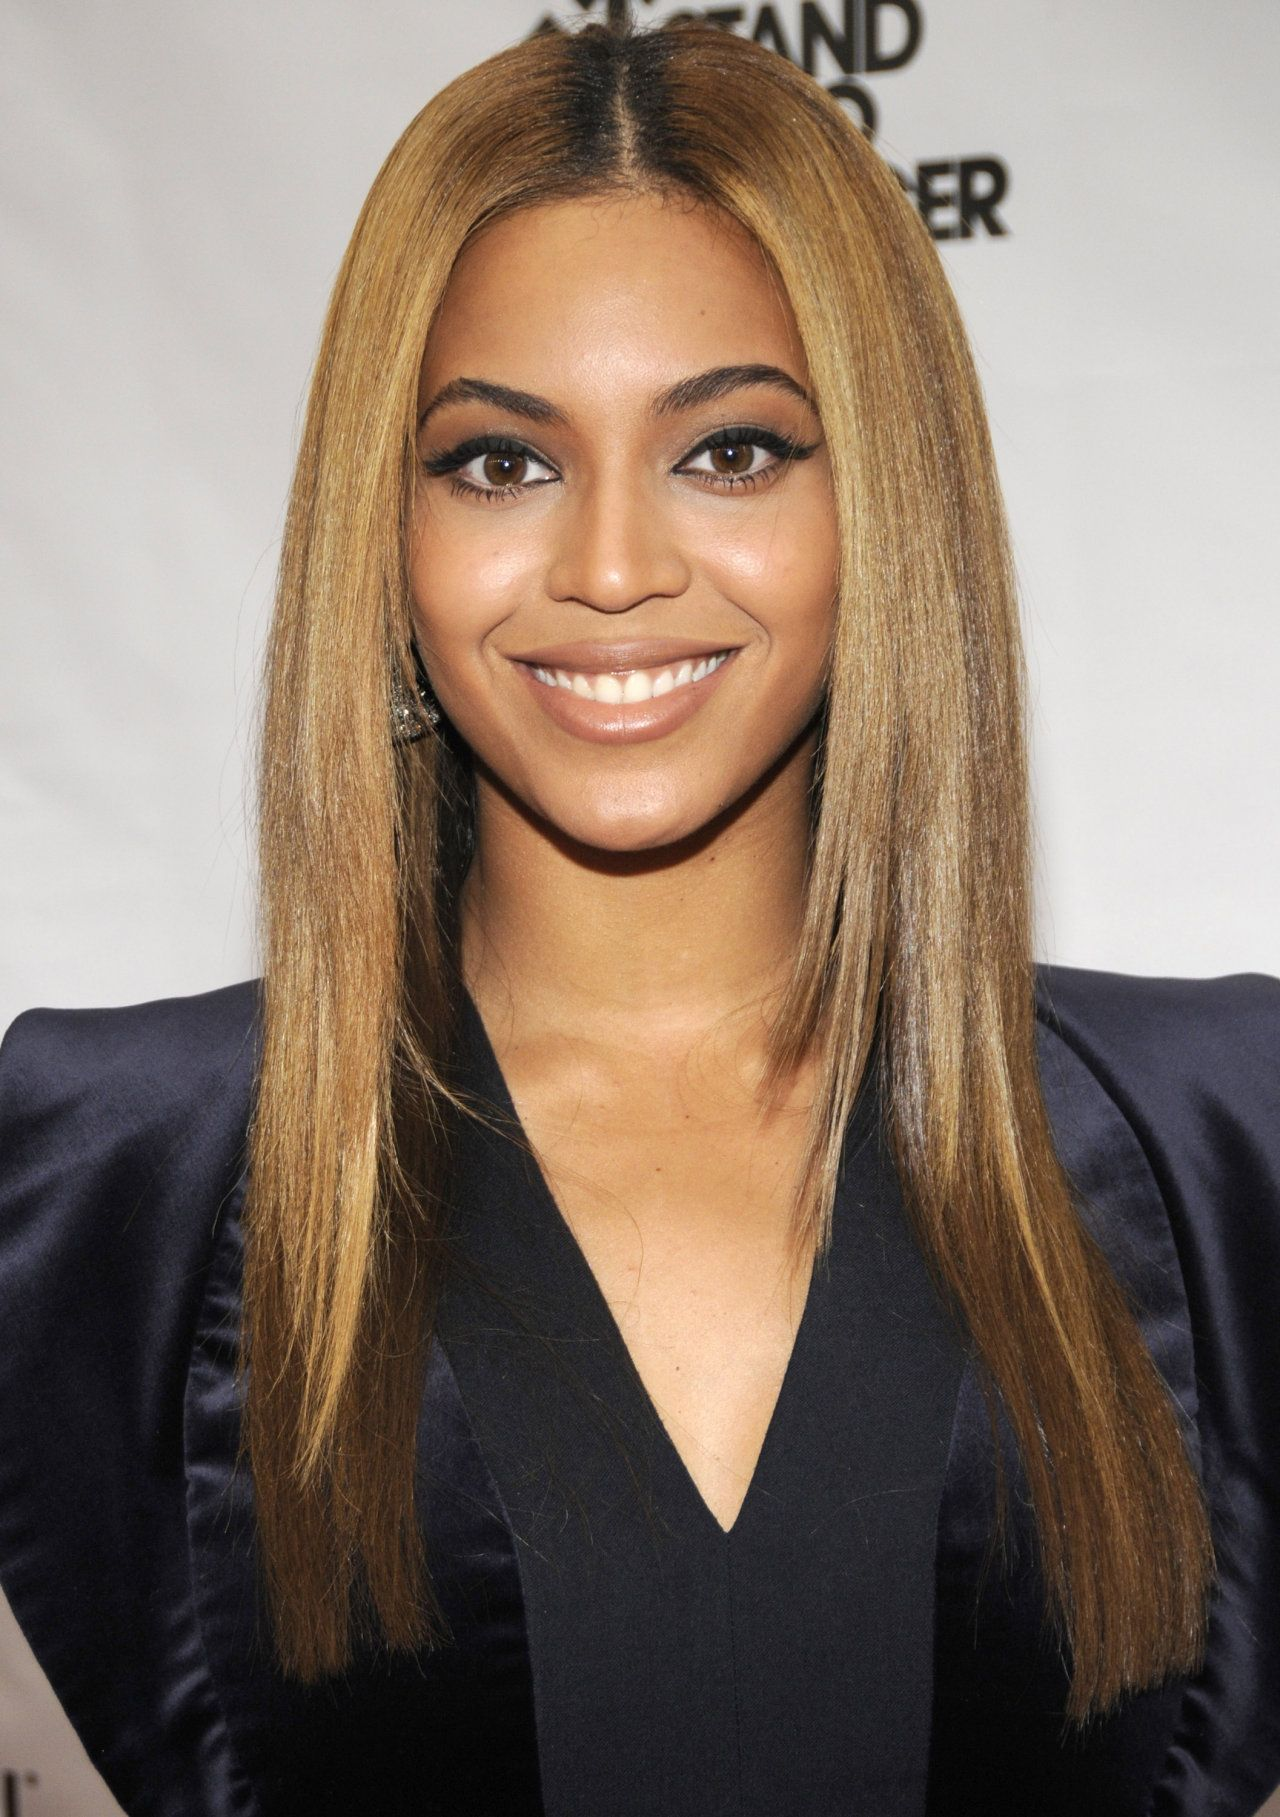





[[0.03016004]]
This is not Nicolas Cage:


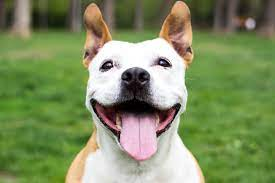





[[3.115798e-09]]
This is not Nicolas Cage:


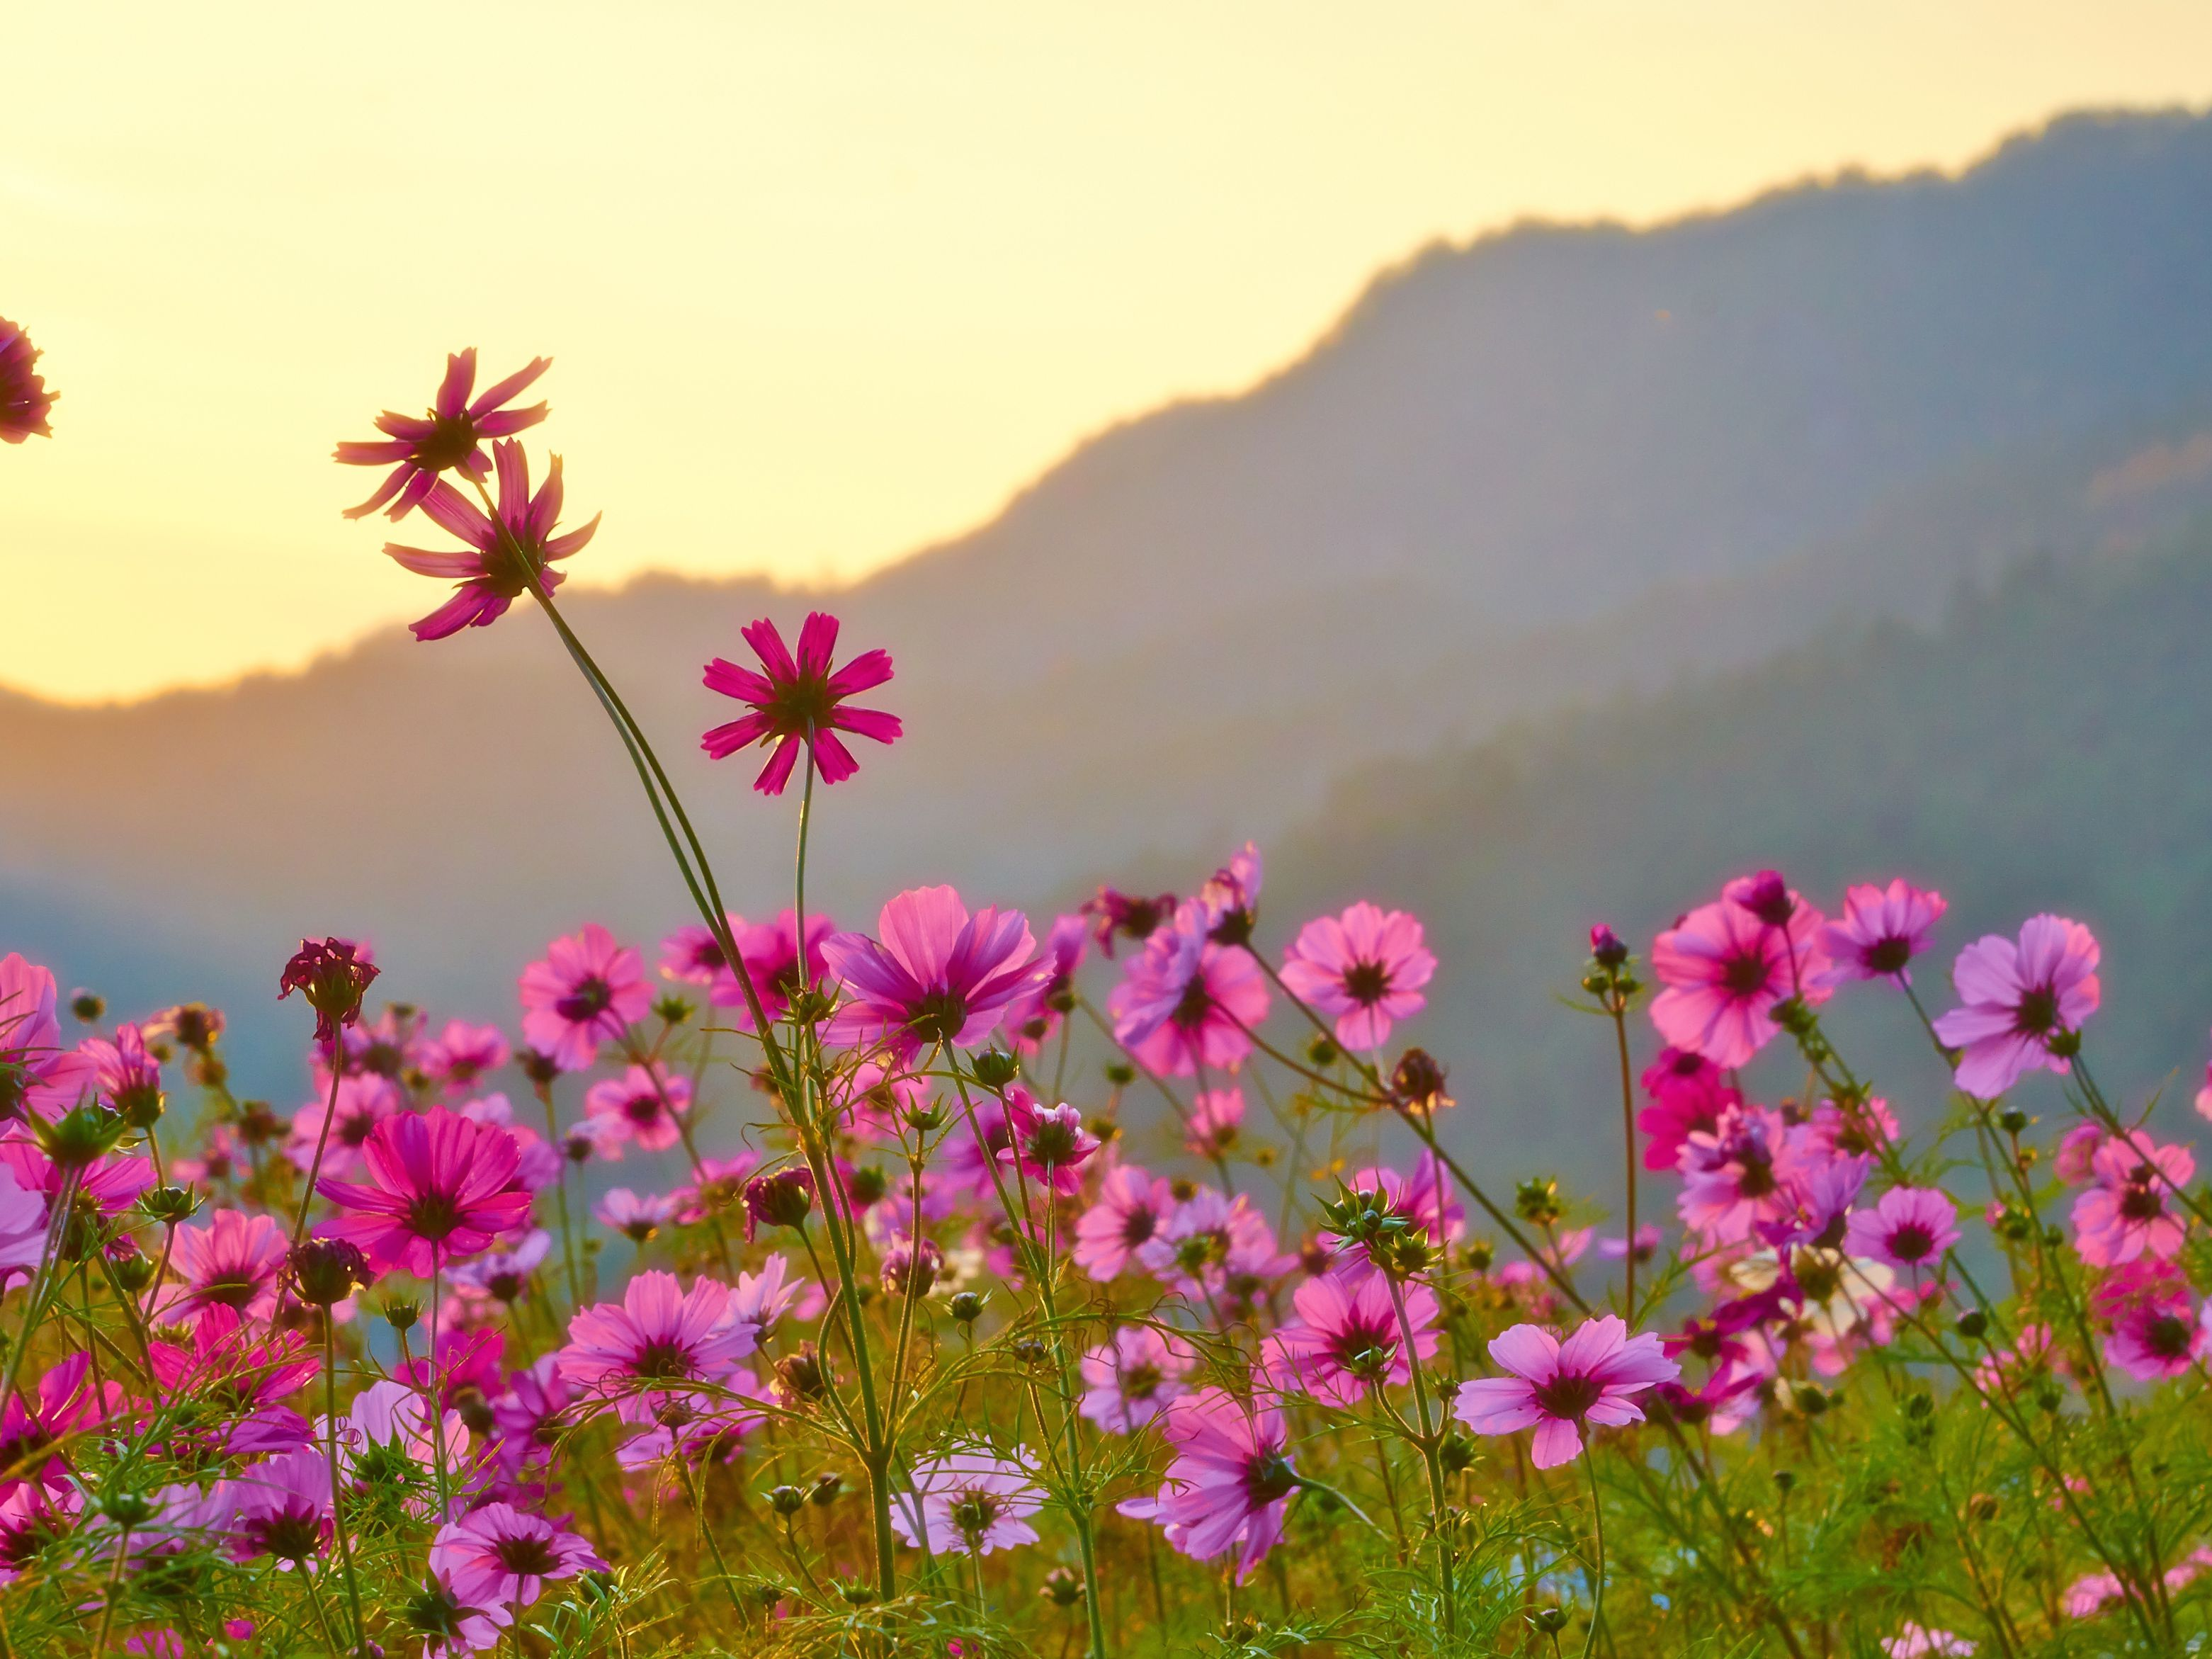





[[5.095215e-07]]
This is not Nicolas Cage:


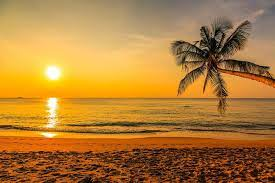





[[0.00114277]]
This is not Nicolas Cage:


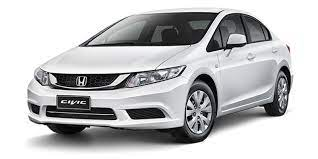

In [12]:
prediction_dir = '/content/drive/MyDrive/Nicolas Cage/prediction'
    
file_names = os.listdir(prediction_dir)
    
for file_name in file_names:
  is_this_nic(prediction_dir + "/" + file_name, classifier)

In [44]:
def label_predict(file, classifier):
  test_image = image.load_img(file, target_size = (180, 180))
  test_image = image.img_to_array(test_image)
  test_image = np.expand_dims(test_image, axis = 0)
  
  result = classifier.predict(test_image)

  if result[0][0] >= 0.7:
    return 1.0
  else:
    return 0.0


In [46]:
import sklearn
from sklearn.metrics import confusion_matrix

prediction_dir = '/content/drive/MyDrive/Nicolas Cage/prediction'
file_names = os.listdir(prediction_dir)

y_true = [1.0 if i < 9 else 0.0 for i in range(20) ]     
y_pred = [label_predict(prediction_dir + "/" + file_name, classifier) for file_name in file_names]

confusion_matrix(y_true, y_pred)

# C00 is true negatives
# C10 is false negatives
# C11 is true positives
# C01 is false positives

array([[8, 3],
       [5, 4]])